# The Z-Transform: Theory and Applications

## Introduction

The **Z-transform** is a fundamental mathematical tool in digital signal processing and control theory. It converts discrete-time signals into a complex frequency-domain representation, analogous to how the Laplace transform handles continuous-time signals.

## Mathematical Definition

For a discrete-time signal $x[n]$, the bilateral Z-transform is defined as:

$$X(z) = \mathcal{Z}\{x[n]\} = \sum_{n=-\infty}^{\infty} x[n] z^{-n}$$

where $z$ is a complex variable. For causal signals (where $x[n] = 0$ for $n < 0$), the unilateral Z-transform simplifies to:

$$X(z) = \sum_{n=0}^{\infty} x[n] z^{-n}$$

## Region of Convergence (ROC)

The Z-transform exists only for values of $z$ where the series converges. This set of values defines the **Region of Convergence (ROC)**. For a right-sided sequence, the ROC is the exterior of a circle: $|z| > R$.

## Key Properties

### Linearity
$$\mathcal{Z}\{a x[n] + b y[n]\} = a X(z) + b Y(z)$$

### Time Shifting
$$\mathcal{Z}\{x[n-k]\} = z^{-k} X(z)$$

### Convolution Theorem
$$\mathcal{Z}\{x[n] * y[n]\} = X(z) \cdot Y(z)$$

### Differentiation in z-domain
$$\mathcal{Z}\{n \cdot x[n]\} = -z \frac{dX(z)}{dz}$$

## Common Z-Transform Pairs

| Signal $x[n]$ | Z-Transform $X(z)$ | ROC |
|---------------|--------------------|---------|
| $\delta[n]$ | $1$ | All $z$ |
| $u[n]$ | $\frac{z}{z-1}$ | $|z| > 1$ |
| $a^n u[n]$ | $\frac{z}{z-a}$ | $|z| > |a|$ |
| $n a^n u[n]$ | $\frac{az}{(z-a)^2}$ | $|z| > |a|$ |

## Practical Implementation

Let's implement the Z-transform numerically and visualize key concepts including:
1. Computing the Z-transform of common signals
2. Visualizing poles and zeros in the z-plane
3. Frequency response analysis
4. Inverse Z-transform via partial fractions

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import signal
from matplotlib.patches import Circle

# Set up plotting style
plt.rcParams['figure.figsize'] = [12, 10]
plt.rcParams['font.size'] = 10
plt.rcParams['axes.grid'] = True

## Example 1: Z-Transform of an Exponential Sequence

Consider the causal exponential sequence $x[n] = a^n u[n]$ where $a = 0.8$.

The Z-transform is:
$$X(z) = \sum_{n=0}^{\infty} a^n z^{-n} = \sum_{n=0}^{\infty} \left(\frac{a}{z}\right)^n = \frac{1}{1 - az^{-1}} = \frac{z}{z-a}$$

for $|z| > |a|$.

In [2]:
# Define the exponential sequence
a = 0.8
n = np.arange(0, 30)
x_n = a ** n

# Numerical computation of Z-transform at various points
def compute_z_transform(x, n_vals, z):
    """Compute Z-transform numerically for a finite sequence."""
    return np.sum(x * z**(-n_vals))

# Evaluate on the unit circle (frequency response)
omega = np.linspace(0, 2*np.pi, 1000)
z_unit_circle = np.exp(1j * omega)

# Compute Z-transform on unit circle
X_z = np.array([compute_z_transform(x_n, n, z) for z in z_unit_circle])

# Analytical solution: z/(z-a)
X_z_analytical = z_unit_circle / (z_unit_circle - a)

print(f"Exponential sequence x[n] = {a}^n u[n]")
print(f"Pole location: z = {a}")
print(f"Zero location: z = 0")

Exponential sequence x[n] = 0.8^n u[n]
Pole location: z = 0.8
Zero location: z = 0


## Example 2: Digital Filter Analysis

Consider a second-order IIR (Infinite Impulse Response) filter with transfer function:

$$H(z) = \frac{b_0 + b_1 z^{-1} + b_2 z^{-2}}{1 + a_1 z^{-1} + a_2 z^{-2}}$$

The poles and zeros of $H(z)$ determine the filter's frequency response characteristics.

In [3]:
# Design a second-order Butterworth lowpass filter
# Cutoff frequency: 0.3 * Nyquist
b, a_coef = signal.butter(2, 0.3, btype='low')

print("Filter coefficients:")
print(f"Numerator (b): {b}")
print(f"Denominator (a): {a_coef}")

# Find poles and zeros
zeros = np.roots(b)
poles = np.roots(a_coef)

print(f"\nZeros: {zeros}")
print(f"Poles: {poles}")
print(f"\nPole magnitudes: {np.abs(poles)}")
print(f"(Filter is stable if all pole magnitudes < 1)")

Filter coefficients:
Numerator (b): [0.13110644 0.26221288 0.13110644]
Denominator (a): [ 1.         -0.74778918  0.27221494]

Zeros: [-1. -1.]
Poles: [0.37389459+0.36389253j 0.37389459-0.36389253j]

Pole magnitudes: [0.52174221 0.52174221]
(Filter is stable if all pole magnitudes < 1)


## Visualization: Pole-Zero Plot and Frequency Response

The **pole-zero plot** in the complex z-plane provides crucial insight into system behavior:
- **Poles** (×): Frequencies where the response is amplified
- **Zeros** (○): Frequencies where the response is attenuated
- **Stability**: System is stable if all poles lie inside the unit circle

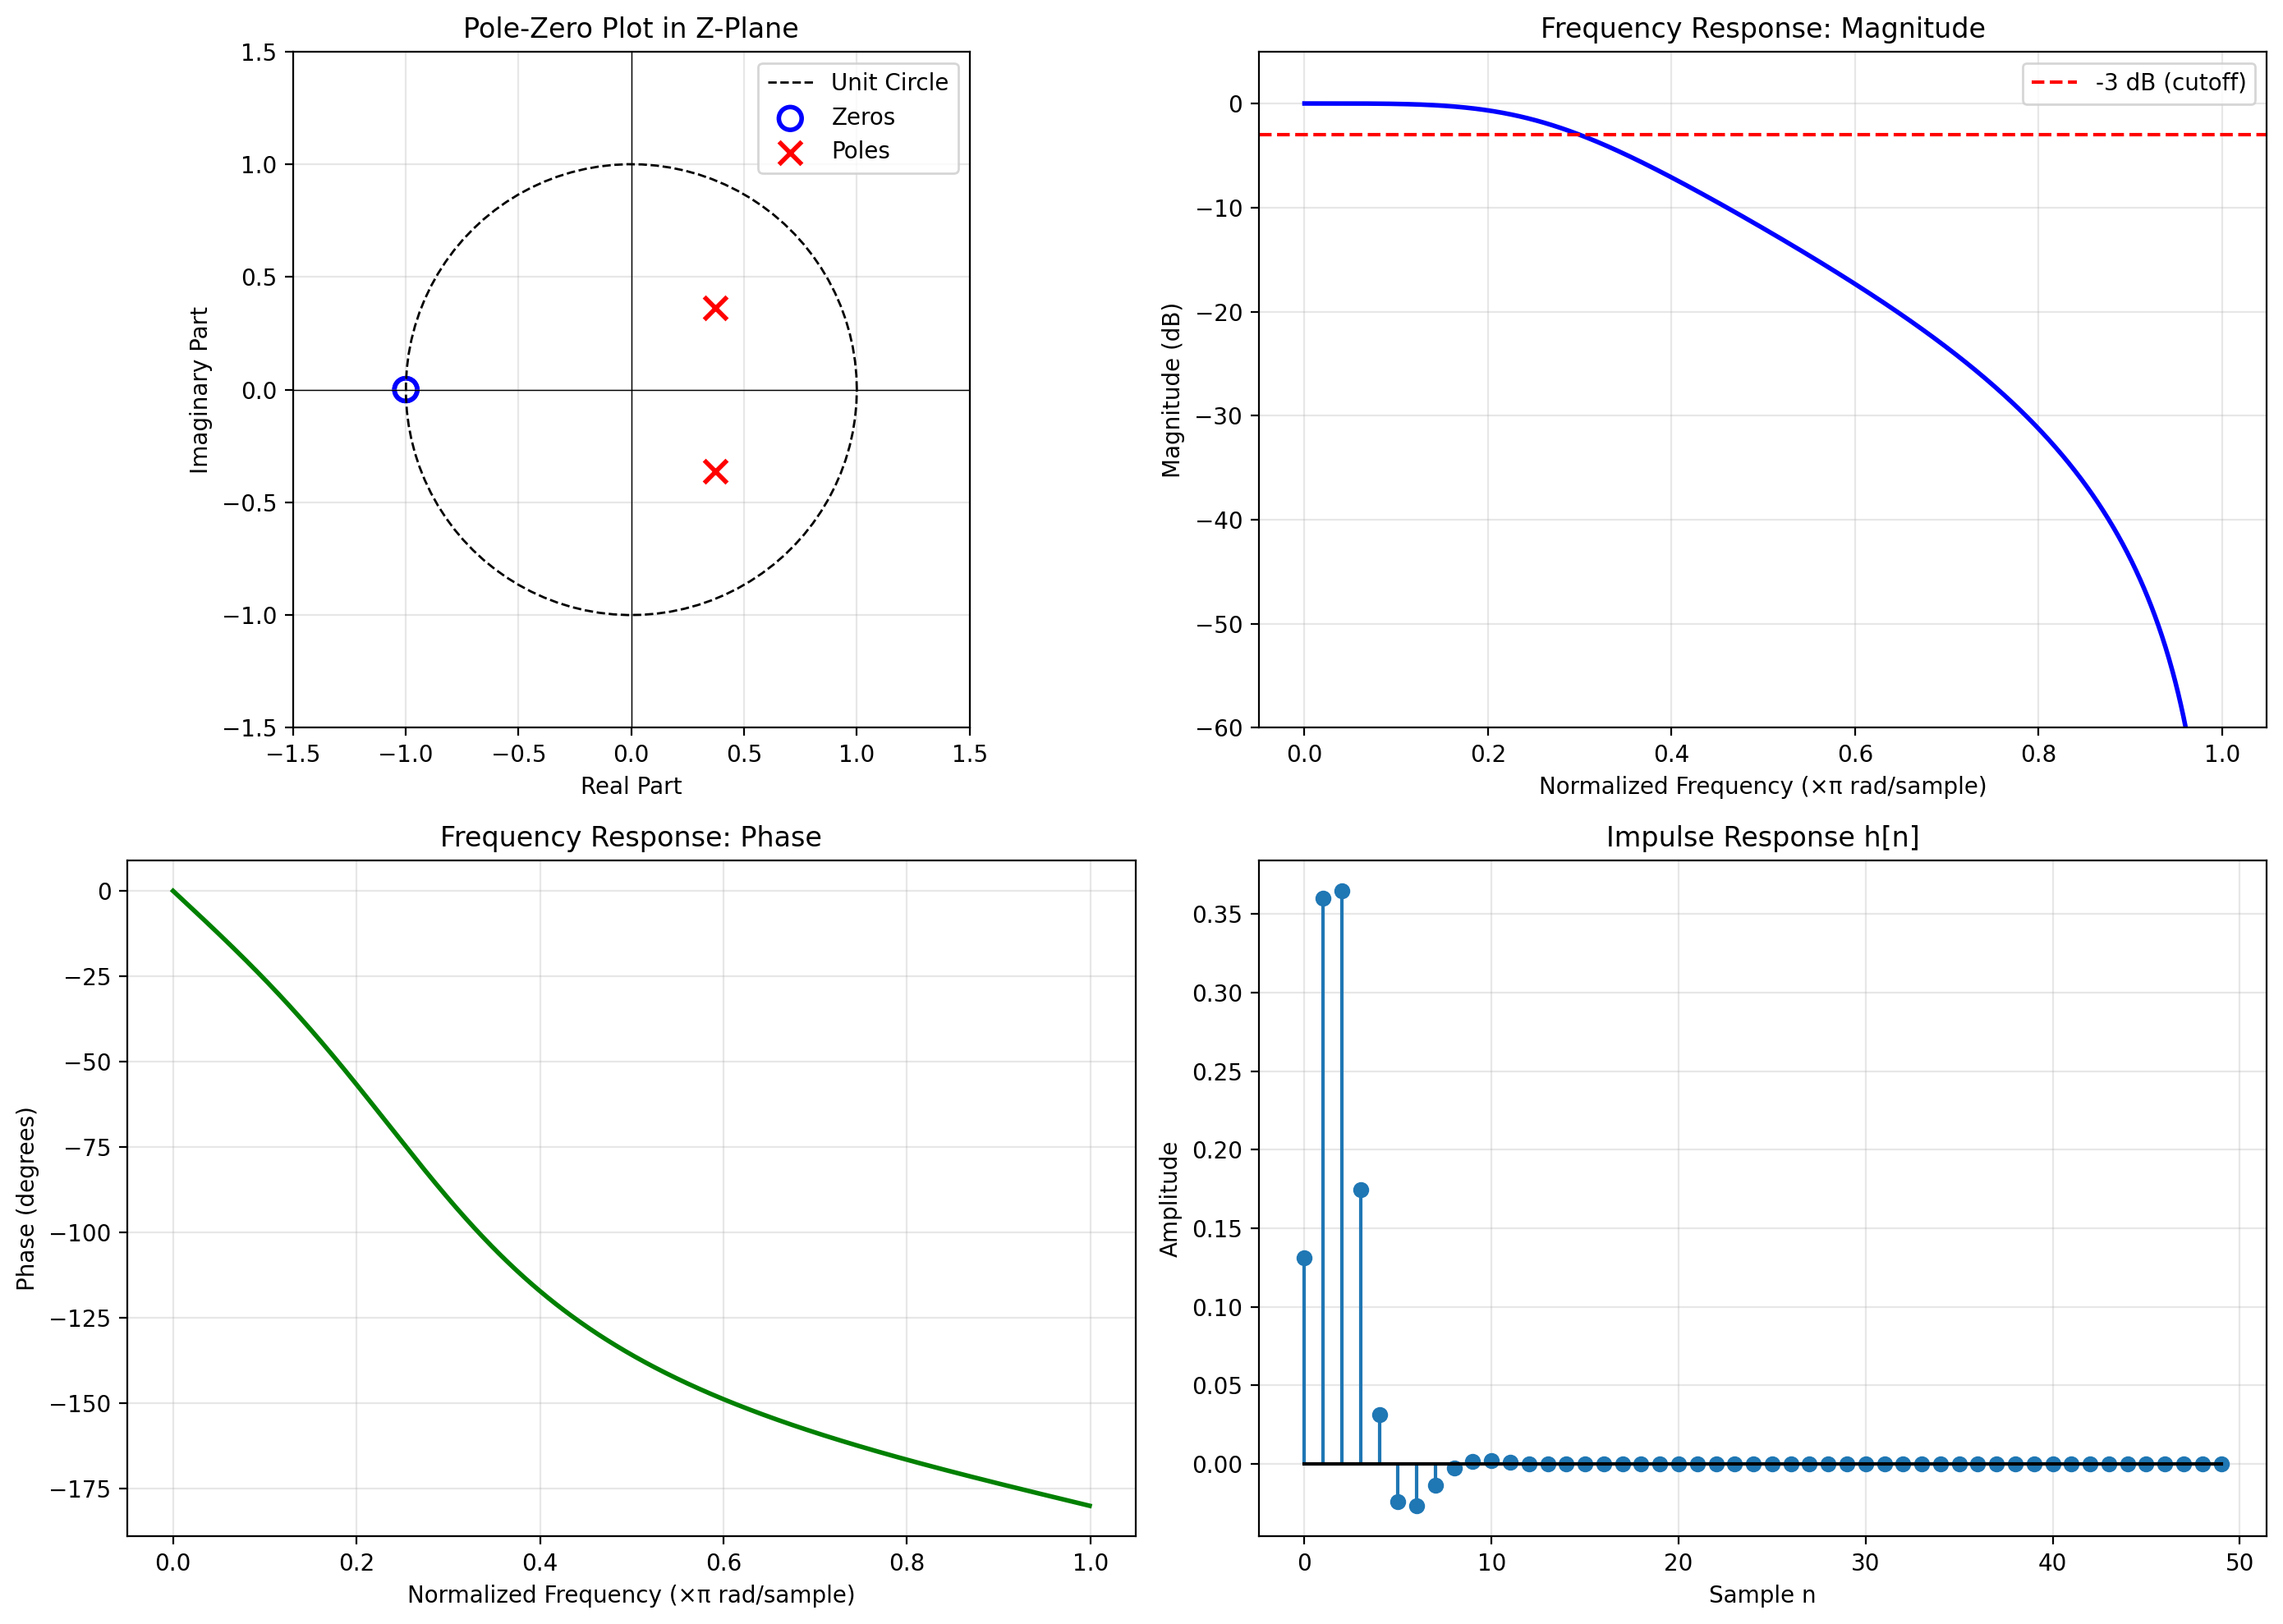


Plot saved to 'plot.png'


In [4]:
fig = plt.figure(figsize=(14, 10))

# Subplot 1: Pole-Zero Plot
ax1 = fig.add_subplot(2, 2, 1)
ax1.set_aspect('equal')

# Draw unit circle
theta = np.linspace(0, 2*np.pi, 100)
ax1.plot(np.cos(theta), np.sin(theta), 'k--', linewidth=1, label='Unit Circle')

# Plot zeros
ax1.scatter(zeros.real, zeros.imag, s=100, marker='o', 
            facecolors='none', edgecolors='blue', linewidth=2, label='Zeros')

# Plot poles
ax1.scatter(poles.real, poles.imag, s=100, marker='x', 
            color='red', linewidth=2, label='Poles')

ax1.axhline(y=0, color='k', linewidth=0.5)
ax1.axvline(x=0, color='k', linewidth=0.5)
ax1.set_xlim(-1.5, 1.5)
ax1.set_ylim(-1.5, 1.5)
ax1.set_xlabel('Real Part')
ax1.set_ylabel('Imaginary Part')
ax1.set_title('Pole-Zero Plot in Z-Plane')
ax1.legend(loc='upper right')
ax1.grid(True, alpha=0.3)

# Subplot 2: Magnitude Response
ax2 = fig.add_subplot(2, 2, 2)
w, h = signal.freqz(b, a_coef, worN=1024)
ax2.plot(w/np.pi, 20*np.log10(np.abs(h)), 'b-', linewidth=2)
ax2.axhline(y=-3, color='r', linestyle='--', label='-3 dB (cutoff)')
ax2.set_xlabel('Normalized Frequency (×π rad/sample)')
ax2.set_ylabel('Magnitude (dB)')
ax2.set_title('Frequency Response: Magnitude')
ax2.set_ylim(-60, 5)
ax2.legend()
ax2.grid(True, alpha=0.3)

# Subplot 3: Phase Response
ax3 = fig.add_subplot(2, 2, 3)
ax3.plot(w/np.pi, np.unwrap(np.angle(h))*180/np.pi, 'g-', linewidth=2)
ax3.set_xlabel('Normalized Frequency (×π rad/sample)')
ax3.set_ylabel('Phase (degrees)')
ax3.set_title('Frequency Response: Phase')
ax3.grid(True, alpha=0.3)

# Subplot 4: Impulse Response
ax4 = fig.add_subplot(2, 2, 4)
impulse = np.zeros(50)
impulse[0] = 1
response = signal.lfilter(b, a_coef, impulse)
ax4.stem(np.arange(50), response, basefmt='k-')
ax4.set_xlabel('Sample n')
ax4.set_ylabel('Amplitude')
ax4.set_title('Impulse Response h[n]')
ax4.grid(True, alpha=0.3)

plt.tight_layout()
plt.savefig('z_transform_analysis.png', dpi=150, bbox_inches='tight')
plt.show()

print("\nPlot saved to 'plot.png'")

## Example 3: Inverse Z-Transform via Partial Fractions

Given a Z-transform $X(z)$, we can find the time-domain sequence using partial fraction expansion.

Consider:
$$X(z) = \frac{z}{(z-0.5)(z-0.8)}$$

Using partial fractions:
$$\frac{X(z)}{z} = \frac{1}{(z-0.5)(z-0.8)} = \frac{A}{z-0.5} + \frac{B}{z-0.8}$$

Solving: $A = \frac{1}{0.5-0.8} = -\frac{10}{3}$, $B = \frac{1}{0.8-0.5} = \frac{10}{3}$

Therefore:
$$x[n] = \frac{10}{3}(0.8^n - 0.5^n)u[n]$$

In [5]:
# Define the system X(z) = z / ((z-0.5)(z-0.8))
# Numerator: z -> [1, 0] in descending powers
# Denominator: (z-0.5)(z-0.8) = z^2 - 1.3z + 0.4

num = [1, 0]  # z
den = [1, -1.3, 0.4]  # z^2 - 1.3z + 0.4

# Partial fraction decomposition
r, p, k = signal.residuez(num, den)

print("Partial Fraction Decomposition:")
print(f"Residues: {r}")
print(f"Poles: {p}")
print(f"Direct terms: {k}")

# Compute inverse Z-transform (time-domain sequence)
n_vals = np.arange(0, 30)
x_inverse = np.zeros(len(n_vals))

for residue, pole in zip(r, p):
    x_inverse += residue * (pole ** n_vals)

# Analytical solution
x_analytical = (10/3) * (0.8**n_vals - 0.5**n_vals)

print(f"\nFirst 10 samples of x[n]:")
for i in range(10):
    print(f"x[{i}] = {x_inverse[i]:.6f}")

Partial Fraction Decomposition:
Residues: [-1.66666667  2.66666667]
Poles: [0.5 0.8]
Direct terms: []

First 10 samples of x[n]:
x[0] = 1.000000
x[1] = 1.300000
x[2] = 1.290000
x[3] = 1.157000
x[4] = 0.988100
x[5] = 0.821730
x[6] = 0.673009
x[7] = 0.546220
x[8] = 0.440882
x[9] = 0.354659


## Applications of the Z-Transform

### 1. Digital Filter Design
The Z-transform is essential for analyzing and designing FIR and IIR filters.

### 2. System Stability Analysis
A discrete-time LTI system is BIBO stable if and only if all poles of $H(z)$ lie strictly inside the unit circle.

### 3. Difference Equation Solution
The Z-transform converts difference equations into algebraic equations, simplifying their solution.

### 4. Control Systems
Used extensively in digital control system design and analysis.

## Relationship to Other Transforms

- **DTFT**: Setting $z = e^{j\omega}$ gives the Discrete-Time Fourier Transform
- **Laplace Transform**: The Z-transform is the discrete-time analog; $z = e^{sT}$ relates them
- **DFT**: The DFT samples the Z-transform on the unit circle at $N$ equally spaced points

## Summary

The Z-transform provides a powerful framework for:
- Analyzing discrete-time signals and systems
- Designing digital filters with specific frequency characteristics
- Determining system stability through pole locations
- Solving linear constant-coefficient difference equations

Key takeaways:
1. The ROC determines whether the Z-transform exists and is crucial for uniqueness
2. Poles inside the unit circle guarantee stability for causal systems
3. The frequency response is obtained by evaluating $H(z)$ on the unit circle
4. Partial fraction expansion enables inverse Z-transform computation